In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install scikit-learn==1.4.1.post1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


#Loading the dataset



In [3]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#Dataset Inspection


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers or unusual values in numerical columns
# This could be as simple as checking basic statistics or using visualizations
print(df.describe())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

 

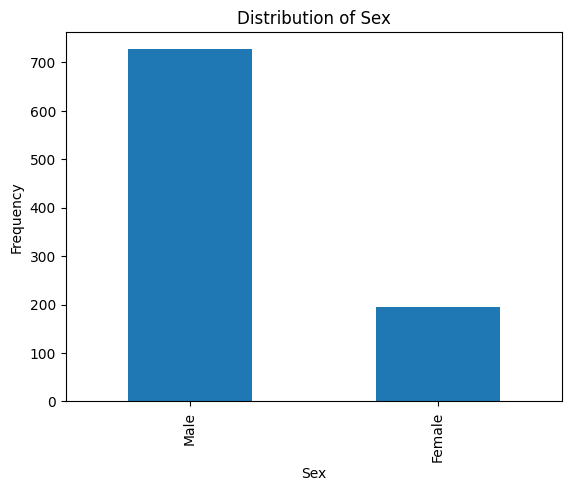

In [9]:
import matplotlib.pyplot as plt

sex_counts = df['sex'].value_counts()
sex_counts.plot(kind='bar')  # This is the correct way to specify the plot type

plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


Checking for missing values and observation. Data completeness is observed in the following columns: 'id', 'age', 'sex', 'dataset', 'cp', and the target 'num'. Significant Missing Data: 'ca': 66.41% data missing.



In [10]:
import pandas as pd
from scipy.stats import gmean
import numpy as np  # Add this import statement

def describex(data):
    data = pd.DataFrame(data)
    # Ensure we only consider numeric columns for these operations
    numeric_data = data.select_dtypes(include=[np.number])

    stats = numeric_data.describe()
    median = numeric_data.median(numeric_only=True)
    skewness = numeric_data.skew(numeric_only=True)
    kurtosis = numeric_data.kurtosis(numeric_only=True)

    median_df = pd.DataFrame({'median': median}).T
    skewness_df = pd.DataFrame({'skewness': skewness}).T
    kurtosis_df = pd.DataFrame({'kurtosis': kurtosis}).T
    # Apply gmean on numeric_data directly
    gmean_df = pd.DataFrame(numeric_data.apply(lambda x: gmean(x.dropna()), axis=0), columns=['gmean']).T

    # Append all additional statistics to the describe DataFrame
    extended_stats = pd.concat([stats, median_df, skewness_df, kurtosis_df, gmean_df])

    return extended_stats

# Assuming 'df' is your DataFrame
print(describex(df))

                  id         age    trestbps        chol      thalch  \
count     920.000000  920.000000  861.000000  890.000000  865.000000   
mean      460.500000   53.510870  132.132404  199.130337  137.545665   
std       265.725422    9.424685   19.066070  110.780810   25.926276   
min         1.000000   28.000000    0.000000    0.000000   60.000000   
25%       230.750000   47.000000  120.000000  175.000000  120.000000   
50%       460.500000   54.000000  130.000000  223.000000  140.000000   
75%       690.250000   60.000000  140.000000  268.000000  157.000000   
max       920.000000   77.000000  200.000000  603.000000  202.000000   
median    460.500000   54.000000  130.000000  223.000000  140.000000   
skewness    0.000000   -0.195994    0.213334   -0.613836   -0.211119   
kurtosis   -1.200000   -0.382930    2.958664    0.062273   -0.479725   
gmean     340.046208   52.631580    0.000000    0.000000  134.931596   

             oldpeak          ca         num  
count     858.00

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


This code is for exploring and understanding the distribution of categorical data within the dataset, providing a clear summary of how many instances of each category exist for each categorical variable.

In [11]:
categorical_cols = ['sex','exang','cp','fbs','restecg','slope','thal']
numerical_cols = ["age","trestbps","chol","thalch","ca", "oldpeak"]
target_col = ["num"]
print("The categorical cols are : ", categorical_cols)
print("The numerical cols are : ", numerical_cols)
print("The target variable is :  ", target_col)

The categorical cols are :  ['sex', 'exang', 'cp', 'fbs', 'restecg', 'slope', 'thal']
The numerical cols are :  ['age', 'trestbps', 'chol', 'thalch', 'ca', 'oldpeak']
The target variable is :   ['num']


#Univariate Analysis

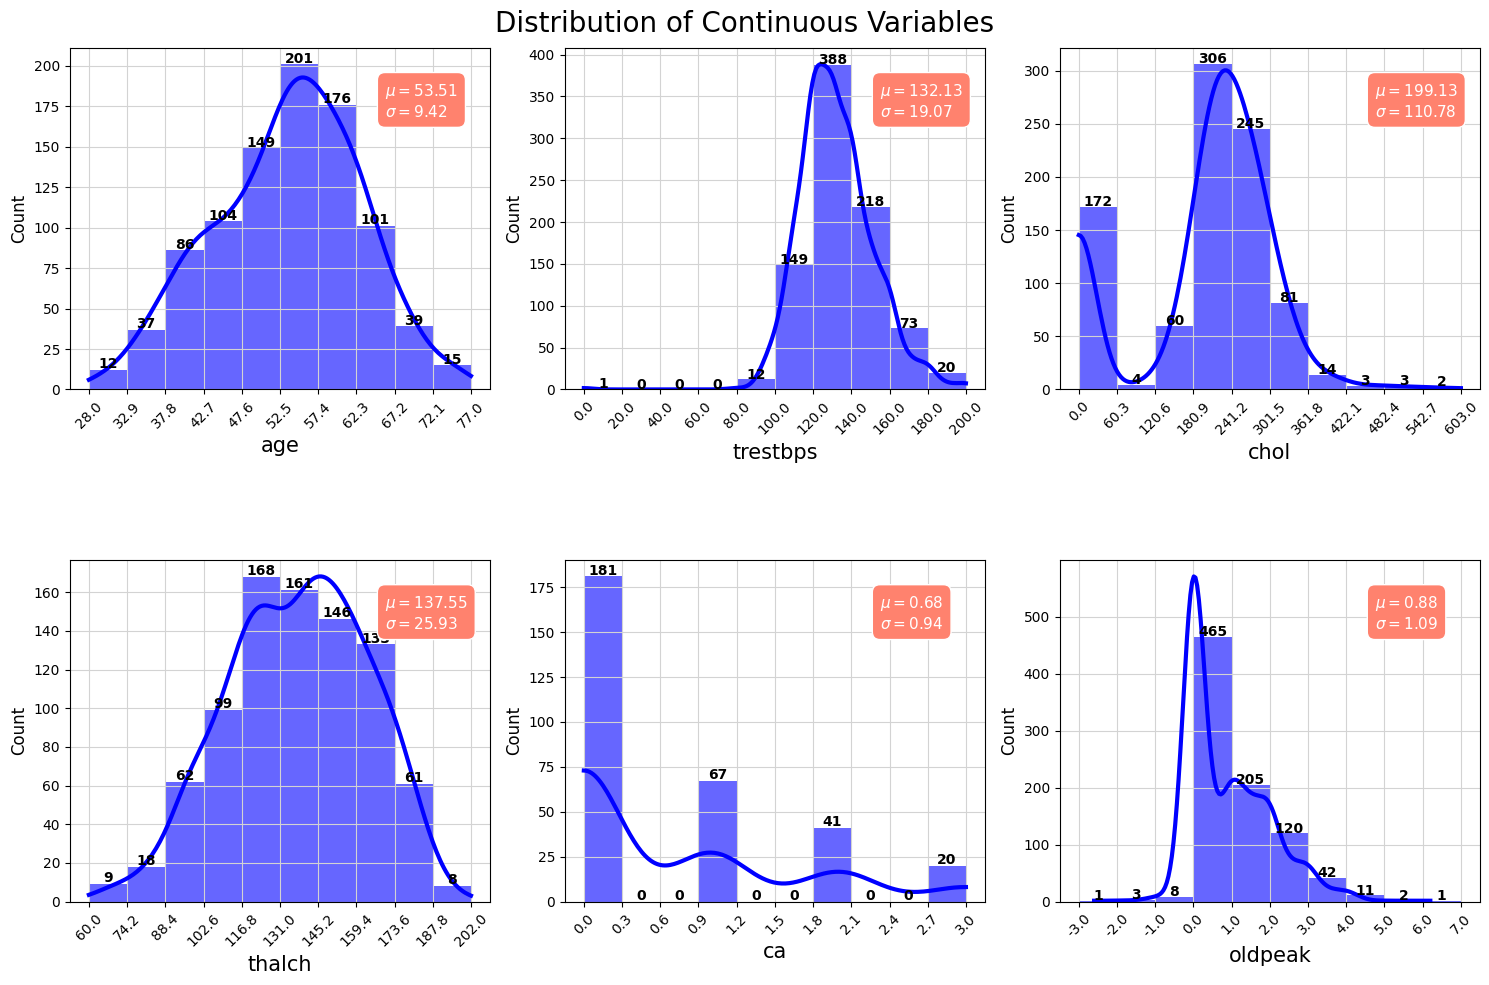

<ipython-input-12-74c64d9e795a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.fillna(0, inplace=True)


In [12]:
# Filter out continuous features for the univariate analysis
df_continuous = df[numerical_cols]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=11, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

    plt.tight_layout()
    plt.suptitle('Distribution of Continuous Variables', fontsize=20)
    plt.subplots_adjust(hspace=0.5)
plt.show()

df_continuous.fillna(0, inplace=True)

#Categorical variable Univariate Analysis

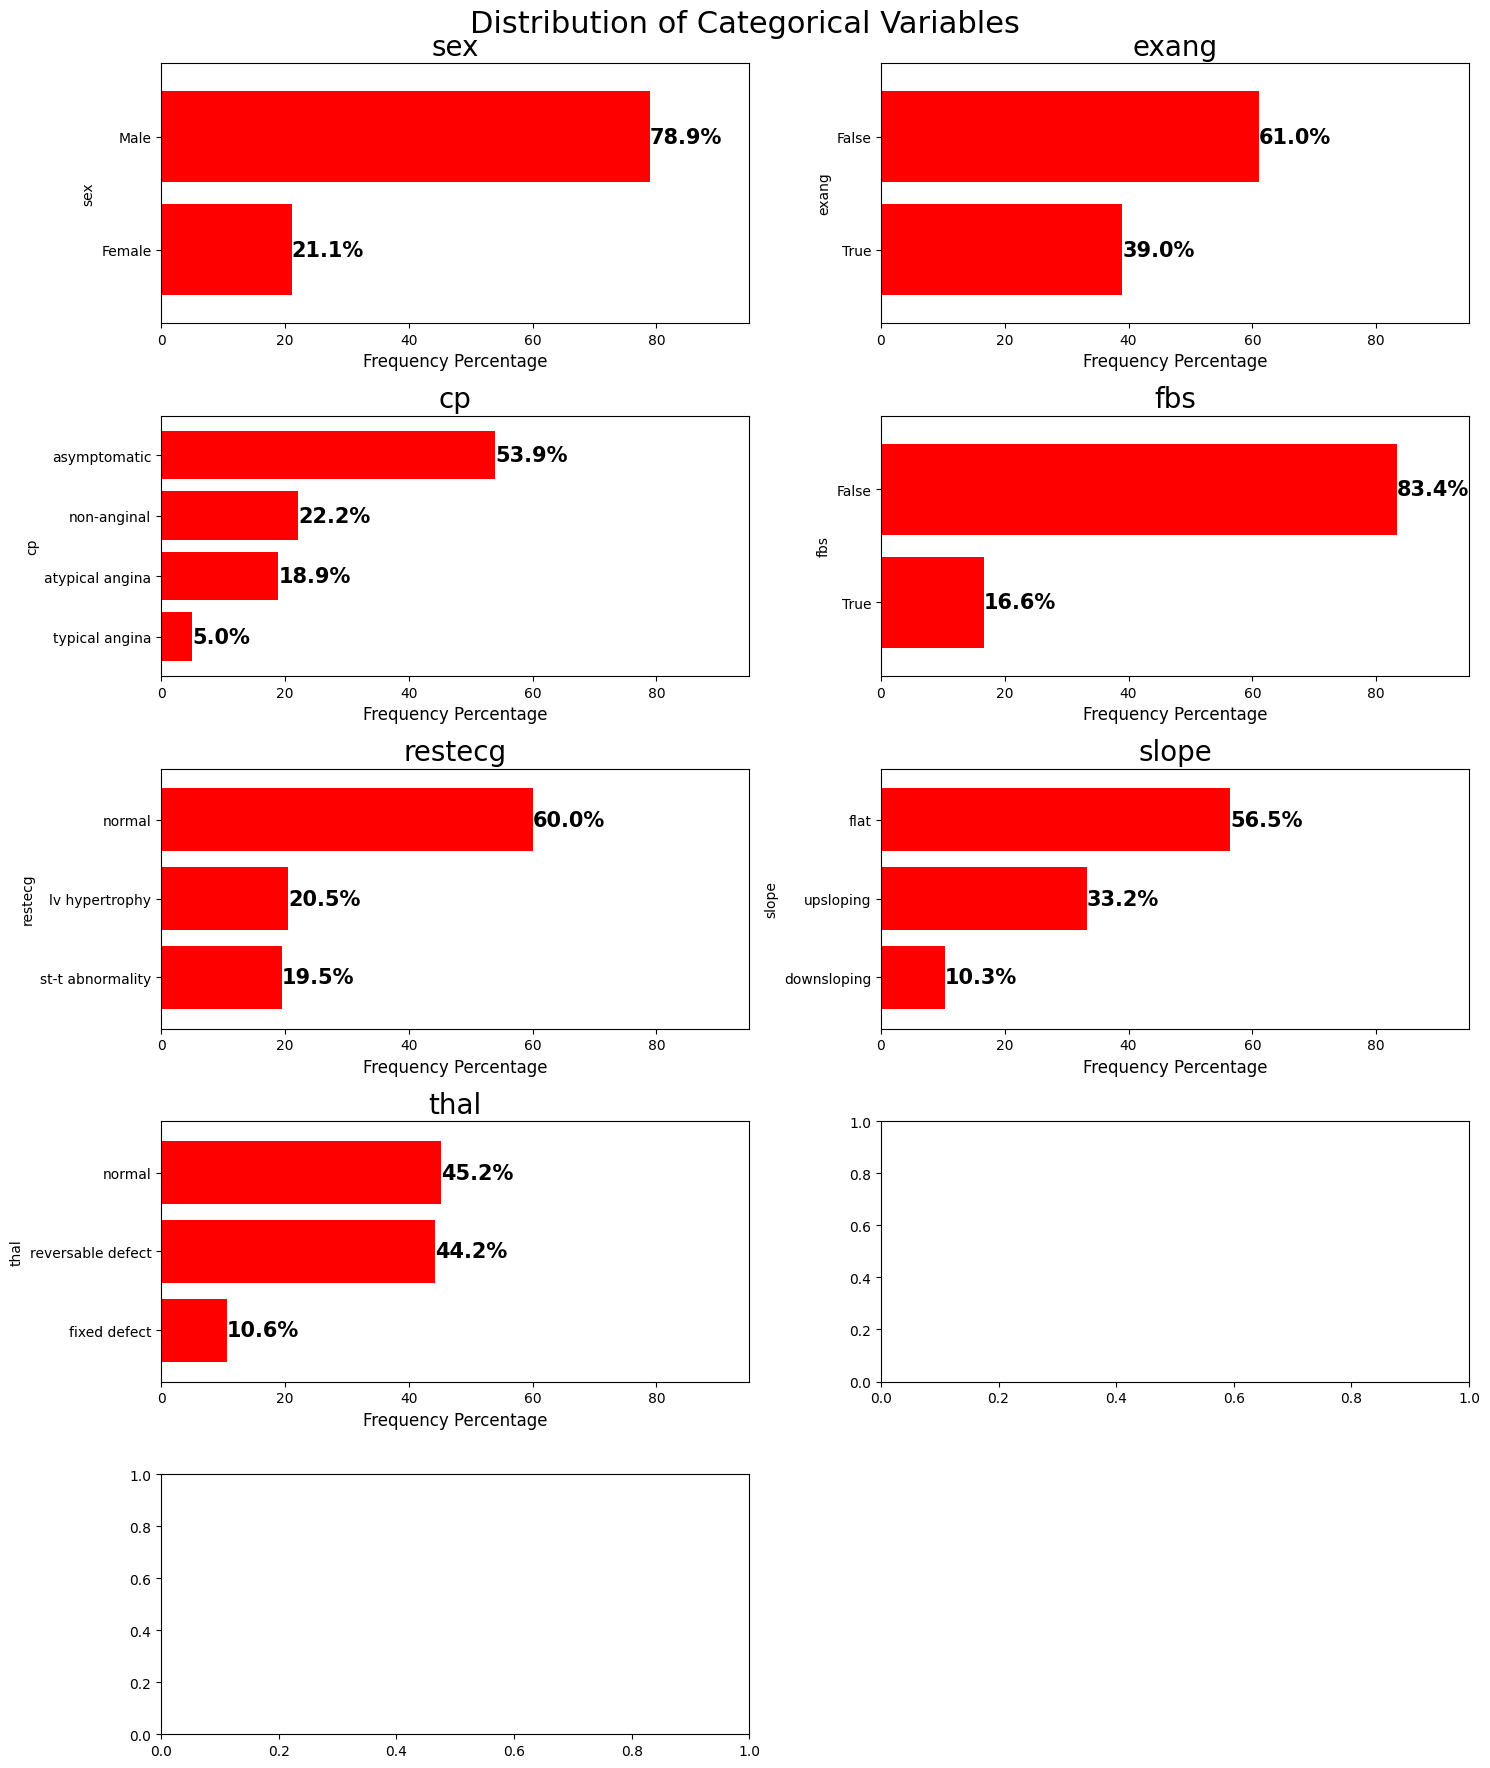

In [ ]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_cols):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#Bivariate Analysis

In [ ]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(num_cols), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_cols):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="num", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["num"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["num"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

In [ ]:
value_counts = df['ca'].value_counts()
print(value_counts)


ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


In [ ]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
value_counts_dict = {}

# Get the value count
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))

# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
sex,Male,726
sex,Female,194
---,---,---
dataset,Cleveland,304
dataset,Hungary,293
dataset,VA Long Beach,200
dataset,Switzerland,123
---,---,---
cp,asymptomatic,496


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming 'df' is your DataFrame containing the dataset
numeric_data = df.select_dtypes(include=[np.number])  # Selecting only numeric columns

# Calculating skewness and kurtosis for each numeric feature
skewness = numeric_data.apply(skew)
kurtosis_vals = numeric_data.apply(kurtosis)  # This computes excess kurtosis

# Creating a DataFrame to summarize the findings
distribution_analysis = pd.DataFrame({
    'Skewness': skewness,
    'Excess Kurtosis': kurtosis_vals
})

print(distribution_analysis)

          Skewness  Excess Kurtosis
id        0.000000        -1.200003
age      -0.195674        -0.387367
trestbps       NaN              NaN
chol           NaN              NaN
thalch         NaN              NaN
oldpeak        NaN              NaN
ca             NaN              NaN
num       0.967300        -0.110274


#Observation

Sex Distribution Imbalance: There are a lot more men (726) than women (194) in the dataset. This means the data might lean more towards men's health outcomes, which could cause gender bias in analysis or predictive modeling.

Chest Pain Type (cp) Variability: In the data, the types of chest pain vary a lot. 'Asymptomatic' (no symptoms) chest pain happens the most, 496 times. This is way more than 'non-anginal' pain (204 times), 'atypical angina' (pain that's not typical, 174 times), and 'typical angina' (classic chest pain, 46 times). Because some pain types are much less common, the model might not predict heart disease as well for those types since there aren't as many examples to learn from.

Thal Test Results Breakdown: Checking the 'thal' (a blood disorder) test results, we find an almost even number of 'normal' (196) and 'reversible defect' (192) results. Fixed defect results are much less common, with only 46 instances. This uneven spread might tilt predictions more towards the categories with more data, which could make the model less accurate in identifying patients with a 'fixed defect'.


Inspecting labels of the target variable

In [ ]:
num_df = df['num'].value_counts()
pd.DataFrame(num_df)

,count
num,
0,411
1,265
2,109
3,107
4,28


Checking the correlation of each feature with the target variable


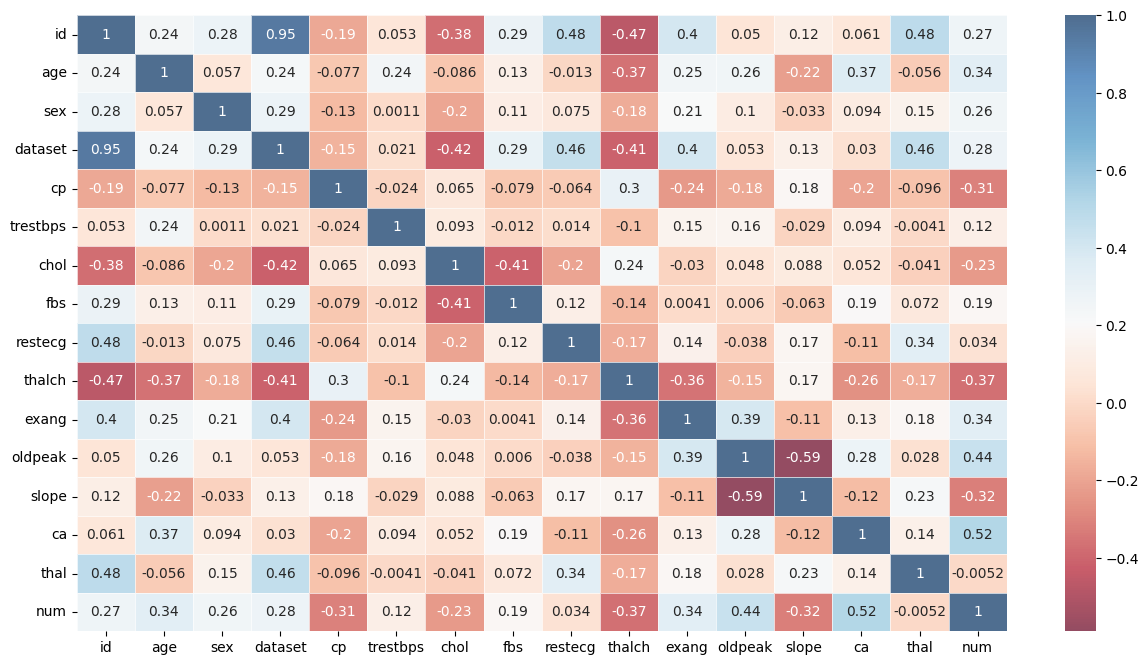

In [ ]:
# plot correlation matrix after converting categorical columns to numerical
# convert categorical columns to numerical using label encoding
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Copy the original DataFrame to preserve the original data
df2 = df.copy()

# Set the color palette for seaborn
sns.set_palette("pastel")

# Identify the categorical columns in df2
cat_cols = df2.select_dtypes(include=['object', 'category']).columns

# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to each categorical column
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

# Compute the correlation matrix for the modified DataFrame
correlation_matrix = df2.corr()

# Sort the features for better visualization in the heatmap
sorted_corr_features = correlation_matrix.index

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sorted_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, linewidths=.5)
plt.show()

In [ ]:
unique_values = df['thal'].unique()
print(unique_values)


['fixed defect' 'normal' 'reversable defect' nan]


#Historgram of all features

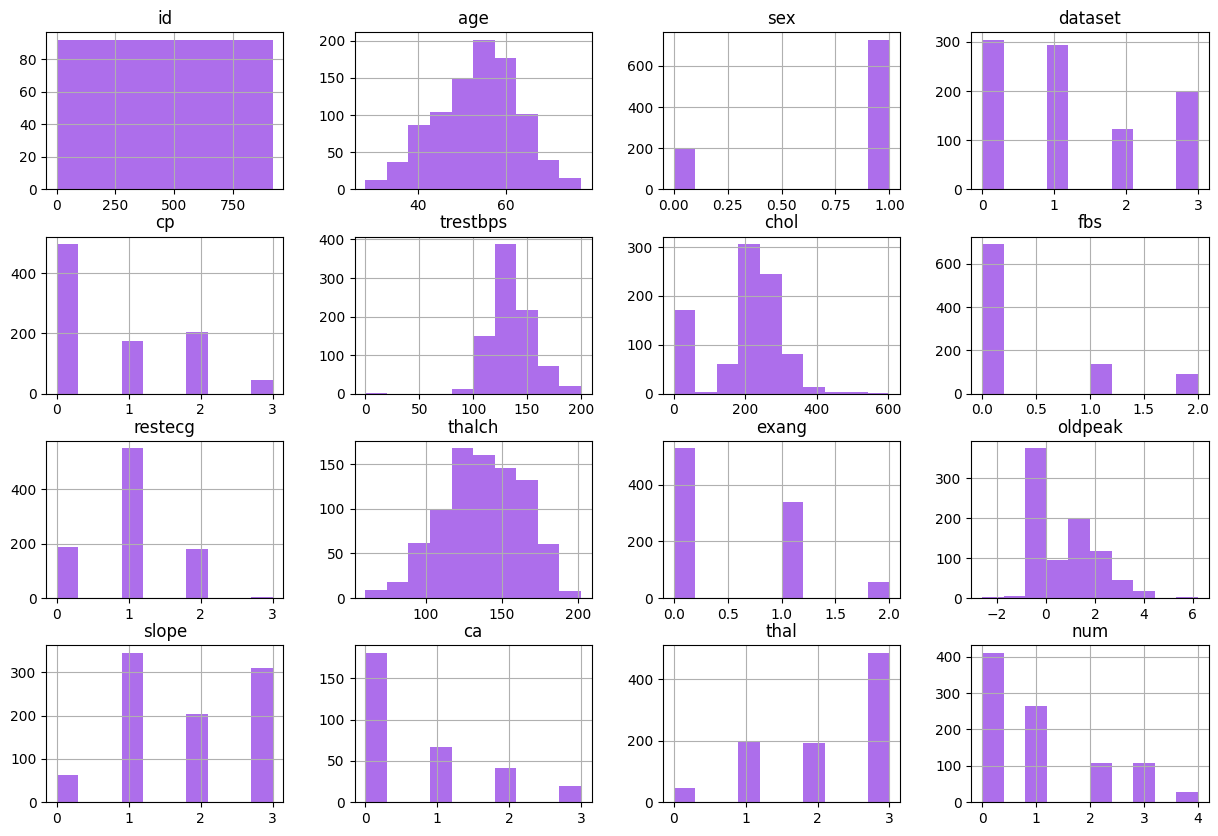

In [ ]:
# plot histogram of all columns using sns
df2.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

#Histograms of Selected Clinical Attributes Grouped by Target Category

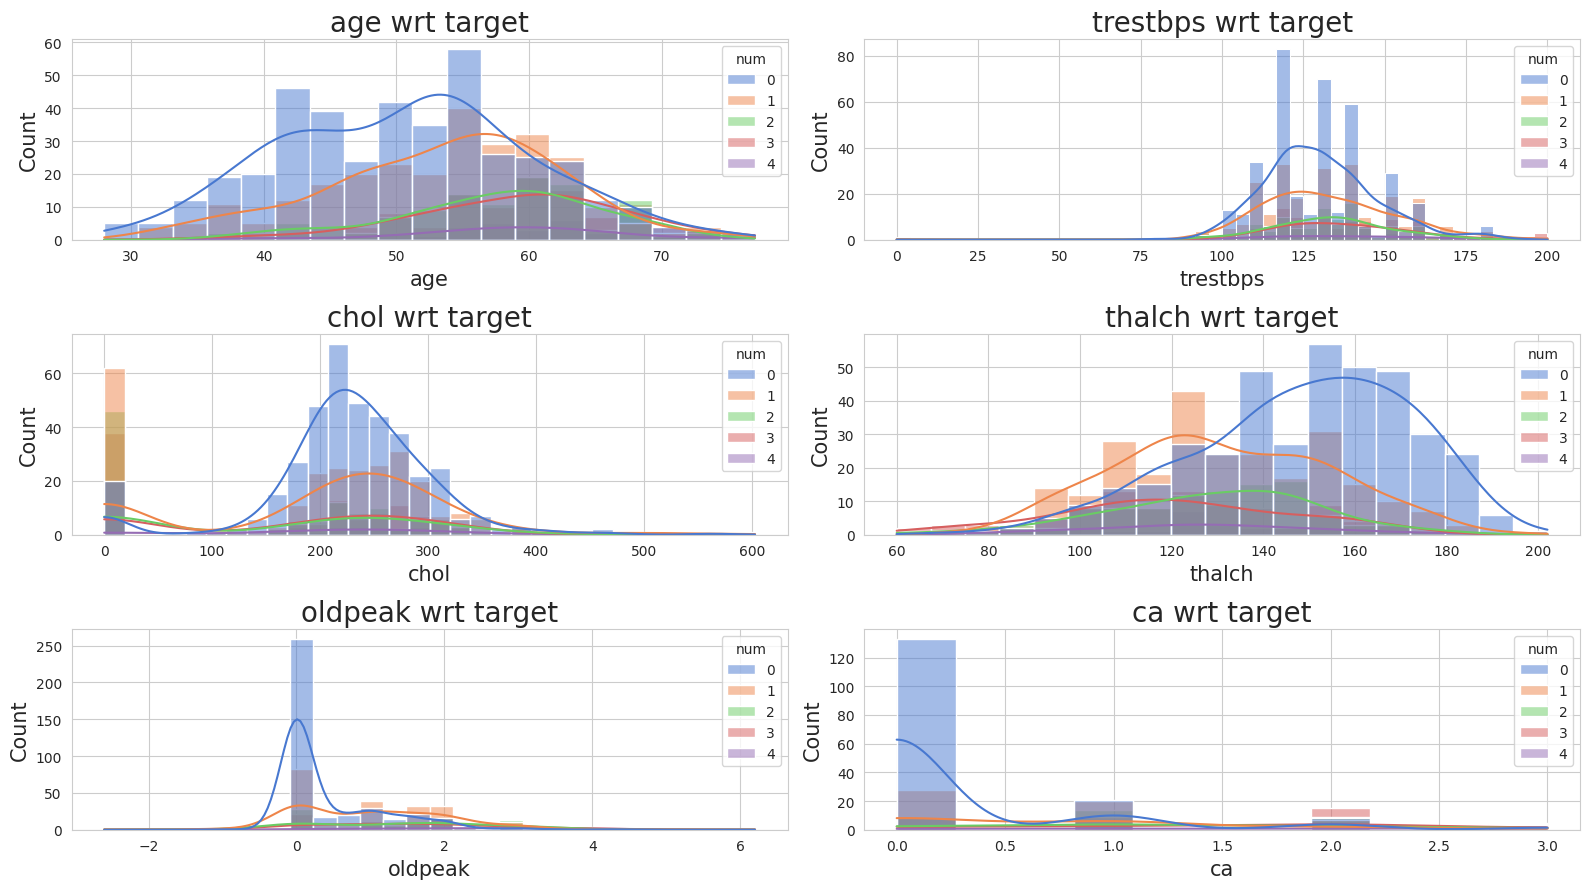

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define your color palette
color_palette = sns.color_palette("muted", len(df['num'].unique()))

# Specify the columns you want to plot manually
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate the number of rows needed based on the number of specified columns
num_plots = len(columns)  # The actual number of plots you want to create
num_rows = (num_plots + 1) // 2  # Add 1 to ensure that we have enough rows for all columns

# Set up the matplotlib figure grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 3))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the specified columns to create individual plots
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, hue='num', palette=color_palette, ax=axes[i])
    axes[i].set_title(f'{column} wrt target', fontsize=20)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)

# Remove any excess subplots if the number of specified columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better fit and to reduce any overlapping
plt.tight_layout()
plt.show()


In [ ]:
# calculate the correlation of each feature with the target variable and sort in descending order
# First, define the print_heading function
def print_heading(heading):
    print(f"----- {heading} -----")

# Assuming correlation_matrix is already defined and includes 'num' column
correlation = correlation_matrix['num'].sort_values(ascending=False)

# Now, use the print_heading function before printing the correlation
print_heading('Correlation of each feature with the target variable')
print(correlation)

----- Correlation of each feature with the target variable -----
num         1.000000
ca          0.516216
oldpeak     0.443084
age         0.339596
exang       0.338166
dataset     0.276203
id          0.273552
sex         0.259342
fbs         0.186664
trestbps    0.122291
restecg     0.034255
thal       -0.005170
chol       -0.231547
cp         -0.314518
slope      -0.318383
thalch     -0.366265
Name: num, dtype: float64


In [ ]:
mappings = {
    'sex': {'Male': 1, 'Female': 0},
    'cp': {'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3},
    'restecg': {'normal': 0, 'abnormal': 1, 'lv hypertrophy': 2},
    'slope': {'upsloping': 1, 'flat': 2, 'downsloping': 3},
    'thal': {'normal': 5, 'reversable defect': 6, 'fixed defect': 7}
}
for column, mapping in mappings.items():
    df2[column] = df2[column].replace(mapping)

In [ ]:
df3 = df2[numerical_cols]
df4 = df2[categorical_cols]

In [ ]:
# Calculate Pearson's correlation
pearson_corr_matrix = df3.corr(method='pearson')

# Display the Pearson's correlation matrix
print(pearson_corr_matrix)

               age  trestbps      chol    thalch        ca   oldpeak
age       1.000000  0.244253 -0.086234 -0.365778  0.370416  0.258243
trestbps  0.244253  1.000000  0.092853 -0.104899  0.093705  0.161908
chol     -0.086234  0.092853  1.000000  0.236121  0.051606  0.047734
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.264094 -0.151174
ca        0.370416  0.093705  0.051606 -0.264094  1.000000  0.281817
oldpeak   0.258243  0.161908  0.047734 -0.151174  0.281817  1.000000


#Observation
High positive coefficients (e.g., ca, oldpeak, age, exang) suggest that as these feature values increase, the likelihood of an increase in num is higher, indicating a strong direct relationship. Conversely, high negative coefficients (e.g., cp, slope, thalach) suggest that as these features increase, the value of num is likely to decrease, indicating a strong inverse relationship.



#Data Preprocessing

In [ ]:
chol_value_counts = df['chol'].value_counts()
print(chol_value_counts)


chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64


#Can Cholesterol be Zero?
Cholesterol is a critical component of cell membranes and is necessary for the production of certain hormones and vitamin D. A zero cholesterol level in the blood is medically impossible because it is essential for basic cellular functions and overall bodily health. The absence of cholesterol would result in cellular dysfunction and is incompatible with life.

Reference: American Heart Association. (n.d.). What Is Cholesterol? Retrieved January 15, 2024, What is Cholestrol?



#Dealing with zero values in cholesterol
To maintain the integrity of the dataset and ensure the accuracy of future analyses, I will convert the zero values to NaN (Not a Number). This conversion highlights these values as missing, making them easier to address during the data cleaning stage. This approach helps in preventing the distortion of statistical analyses and the performance of machine learning models due to these incorrect entries.

The correction of missing values, especially for the Cholesterol variable, will be tackled in the designated section on missing value imputation later on.

In [ ]:
# Check for all zero cholestrol values
len(df[df['chol'] == 0])
# calculate the percentage of zero values in the column
zero_percentage = len(df[df['chol'] == 0]) / df.shape[0] * 100
print_heading("Percentage of zero Cholesterol values: {:.2f}%".format(zero_percentage))

----- Percentage of zero Cholesterol values: 18.70% -----


In [ ]:
# replace zero values with NaN in cholestrol column
df['chol'] = df['chol'].replace(0, np.nan)

In [ ]:
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)
print_heading("Percentage of missing Cholesterol values: {:.2f}%".format(missing_percentage))

----- Percentage of missing Cholesterol values: 21.96% -----


#Dealing with missing values
Missing values refer to data points in a dataset that are absent or unrecorded. These gaps in data can arise from multiple sources, including mistakes during data gathering, omissions in data entry, or instances where information is not relevant or obtainable.

Neglecting to address missing values can distort analysis outcomes or lead to inaccuracies, as numerous algorithms are incapable of handling undefined or absent values, potentially resulting in computational errors. Furthermore, models developed with datasets that are not fully complete may exhibit bias or reduced precision, compromising the dependability of any predictions or conclusions derived from such data.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers or unusual values in numerical columns
# This could be as simple as checking basic statistics or using visualizations
print(df.describe())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  718.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  246.832869  137.545665    0.878788   
std    265.725422    9.424685   19.066070   58.527062   25.926276    1.091226   
min      1.000000   28.000000    0.000000   85.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  210.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  239.500000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  276.750000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

 

In [ ]:
# Displaying the percentages of the missing values in each column
print_heading("Percentage of missing values in each column")
feature_percent = round(((df.isnull().sum() / len(df)) * 100 ).sort_values(ascending=False),2)

# add % sympbol
feature_percent = feature_percent.astype(str) + '%'
feature_percent

----- Percentage of missing values in each column -----


ca          66.41%
thal        52.83%
slope       33.59%
chol        21.96%
fbs          9.78%
oldpeak      6.74%
trestbps     6.41%
thalch       5.98%
exang        5.98%
restecg      0.22%
id            0.0%
age           0.0%
sex           0.0%
dataset       0.0%
cp            0.0%
num           0.0%
dtype: object

Observation.

This breakdown shows that some columns, especially ca and thal, have a high proportion of missing data, which might significantly impact any analysis or modeling efforts using this dataset. Handling these missing values appropriately will be crucial for maintaining the integrity of any subsequent analyses or predictions made from this dataset.

#Addressing Missing Values Below 20%
In instances where the missing data constitutes less than 20% of the dataset, we will deploy the following two imputation techniques:

Simple imputation- is a process where missing values are filled in using a basic statistical measure from the observed data points—typically the mean, median, or mode.

KNN imputation - K-Nearest Neighbors is a method for filling in missing values in a dataset by finding the 'K' closest neighbors to the observation with missing data and imputing values using the mean or median of these neighbors.

KNNImputer on Cholstrol with 18% missing values

In [ ]:
# Import KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer

# Initialize KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Use KNNImputer to fill missing values in 'chol' column
df['chol'] = imputer.fit_transform(df[['chol']])

# Convert 'chol' column to integer type
df['chol'] = df['chol'].astype(int)


SimpleImputer on the features with less than 10% missing values

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# Define the print_heading function
def print_heading(heading):
    print(f"\n----- {heading} -----\n")

numerical_cols = [
    col
    for col in df.columns
    if (
        (df[col].dtype in ['int64', 'float64']) and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and
        (col != target_variable)
    )
]

categorical_cols = [
    col
    for col in df.columns
    if (
        df[col].dtype == 'object' and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold
    )
]

# Apply simple imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:, col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION')

missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()
print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}\n")

print_heading('HIGH MISSING VALUES FEATURES')

print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")



----- OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION -----

The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64


----- HIGH MISSING VALUES FEATURES -----

The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


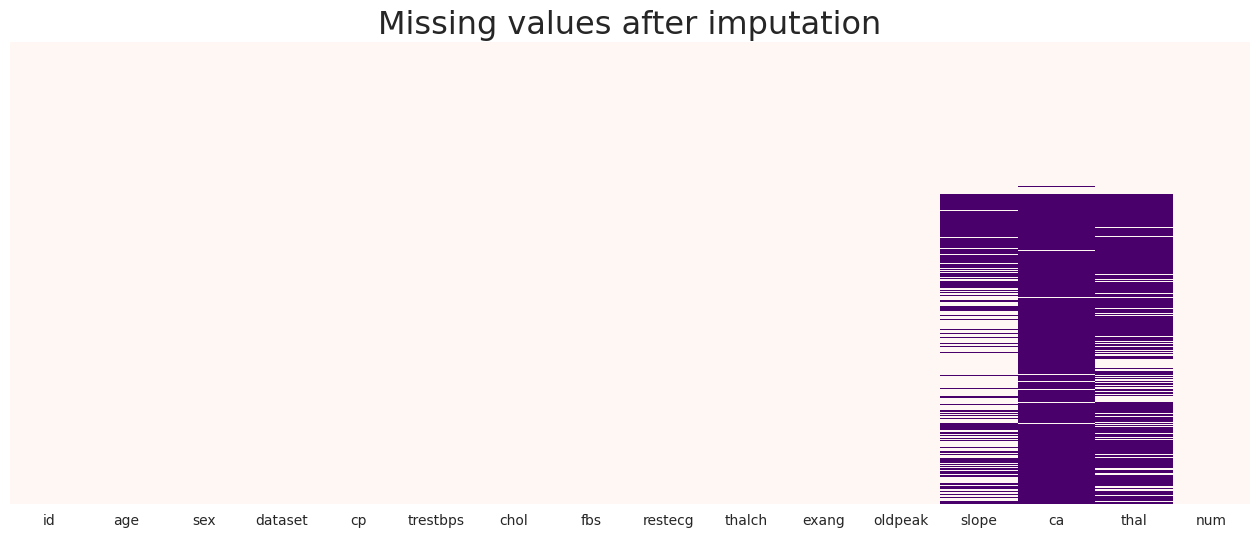

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers or unusual values in numerical columns
# This could be as simple as checking basic statistics or using visualizations
print(df.describe())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  131.995652  246.650000  137.692391    0.853261   
std    265.725422    9.424685   18.451300   51.697342   25.145235    1.058049   
min      1.000000   28.000000    0.000000   85.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  217.750000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  246.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

 

#Tackling Significant Missingness¶
We plan to tackle the imputation of missing values in features that have a significant amount of data missing in columns like 'ca', 'slope' by leveraging the Random Forest algorithm. The strategy is to divide the dataset into two subsets: the first will consist of records without missing values, and the second will contain the instances with missing values in the pertinent features. We will utilize the first subset to train the Random Forest model. Once the model is adequately trained and apply it to the second subset which has the missing values. We,will merge these predictions back into the original dataset, thereby replacing the missing entries with the imputed values.



#Steps
1.Separate the Data: Split your dataset into two subsets:

Subset A: Rows without any missing values in the high-missing-rate features. Subset B: Rows with missing values in those particular features. Train the Model: Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

2.Predict Missing Values: Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

3.Impute the Data: Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

4.Recombine the Data: Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.

In [ ]:
# split the dataset into two subset with one contaning complete data and the other containing
# missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_c = df.dropna().copy()

# create a new dataframe which contains all the rows that have nan values
df_m = df[df.isna().any(axis=1)].copy()

print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_c.shape}")
print("\n")
print_heading('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_m.shape}")


----- COMPLETE DATA WITH NO MISSING VALUES -----

The shape of the complete dataframe is: (299, 16)



----- MISSING DATA WITH HIGH MISSING VALUES -----

The shape of the dataframe with missing values is: (621, 16)


#Applying Random forest to train the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df_c is your cleaned DataFrame and print_heading is a function you've defined to print section headers

def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_c.drop(drop_columns, axis=1)

    # Select the target variable(s)
    y = df_c[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print_heading(f'MODEL PERFORMANCE FOR {target_variable.upper()}')
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 2)}")
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")

    # Return the trained model
    return model


We create a new DataFrame df_new by dropping the columns with missing values (slope, ca, and thal) from df_m. This step is crucial for preparing the data for prediction by removing the target variables that we aim to predict

#Selecting Predictors for Slope -
start by selecting predictors that have minimal missing values. Excluding Ca and Thalassemia are my choices, considering their high missing values.

Training a Model for Slope, then train a model to estimate the missing Slope values.

Imputing Slope After the model training, impute the missing values in Slope, ensuring the integrity of the data.

Updating the Dataset with Slope Once imputed, integrate the Slope data back into the dataset, reaffirming its completeness.

In [ ]:
# create a new dataframe and drop the target variables
df_new = df_m.drop(['slope', 'ca', 'thal'], axis=1)

In [ ]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
model_1  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])


----- MODEL PERFORMANCE FOR SLOPE -----

The accuracy of the model is: 0.72
Classification report:
              precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



Repeat the process for ca and thal

In [ ]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])


----- MODEL PERFORMANCE FOR CA -----

The accuracy of the model is: 0.72
Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# # Train and evaluate a model for predicting the 'thal' feature.
model_thal = predict_and_evaluate('thal', ['thal'])


----- MODEL PERFORMANCE FOR THAL -----

The accuracy of the model is: 0.7
Classification report:
                   precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Predicting missing values from trained model

In [ ]:
def predict_values(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)

In [ ]:
# Encode categorical features and predict the 'slope' column in df_new
predict_values(df_new, 'slope', model_1)
# Update the 'slope' column in df_missing with the predicted values
df_m.loc[:,'slope'] = df_new['slope']

df_new = df_m.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_new
predict_values(df_new, 'ca', model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_m.loc[:, 'ca'] = df_new['ca']

df_new = df_m.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_bew
predict_values(df_new, 'thal', model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_m.loc[:, 'thal'] = df_new['thal']

Merging the datasets

In [ ]:
# merge df_clean and df_missing
df = pd.concat([df_c, df_m])

print_heading('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")


----- DATASET SHAPE INSPECT -----

The shape of the dataset is: 920 rows and 16 columns.


In [ ]:
# Display the missing values if any in the dataset for verification
print_heading('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")


----- MISSING VALUES INSPECT -----

There are no missing values in the dataset.


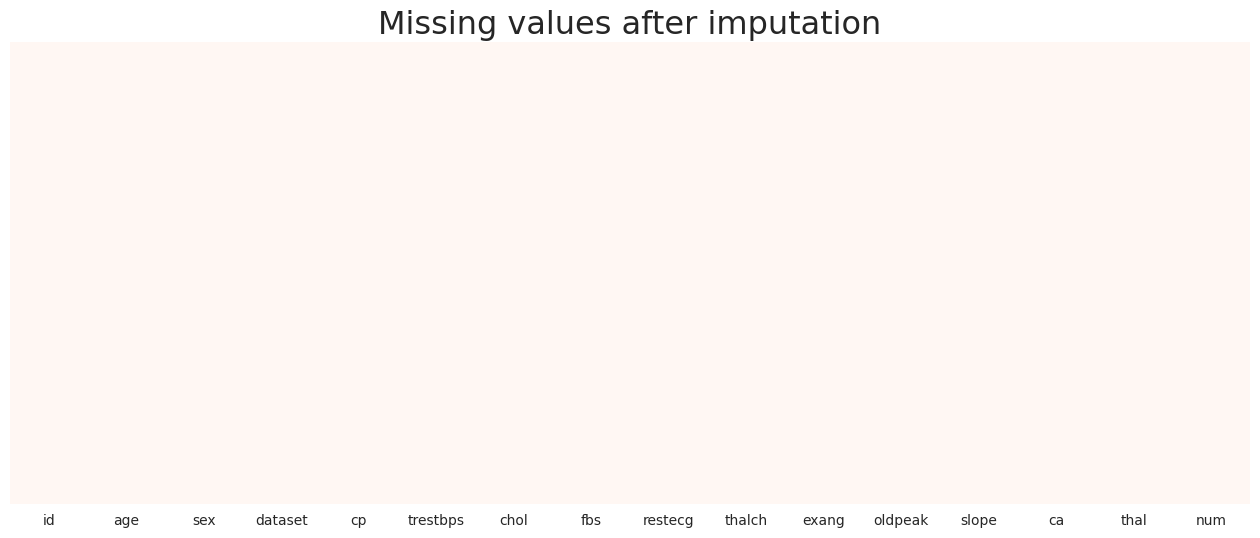

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [ ]:
new_df = df.copy()

In [ ]:
from google.colab import files

# Save DataFrame to a CSV file
new_df.to_csv('new_df.csv', index=False)

# Trigger a download prompt in the browser
files.download('new_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
value_counts = df['ca'].value_counts()
print(value_counts)


ca
0.0    702
1.0    125
2.0     71
3.0     22
Name: count, dtype: int64


In [ ]:
print(df.describe())


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  131.995652  246.650000  137.692391    0.853261   
std    265.725422    9.424685   18.451300   51.697342   25.145235    1.058049   
min      1.000000   28.000000    0.000000   85.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  217.750000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  246.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  920.000000  920.000000  
mean     0.361957    0.995652  
std      0.727561    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    2.000000  
max      3.000

In [ ]:
value_counts = df['trestbps'].value_counts()
print(value_counts)


trestbps
130.0    174
120.0    131
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
# min max scaling to scale the thalch ca chol and tresbps columns
#def scale_columns(df, columns):

    #from sklearn.preprocessing import MinMaxScaler
    #scaler = MinMaxScaler()

    #for column in columns:
        #df[column] = scaler.fit_transform(df[[column]])

    #return df

#df = scale_columns(df, ['thalch', 'chol', 'trestbps', 'ca'])

In [ ]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),

        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
df.oldpeak.describe()

count    920.000000
mean       0.853261
std        1.058049
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [ ]:
skewness = df['oldpeak'].skew()
print("Skewness of oldpeak:", skewness)


Skewness of oldpeak: 1.1347025952263665


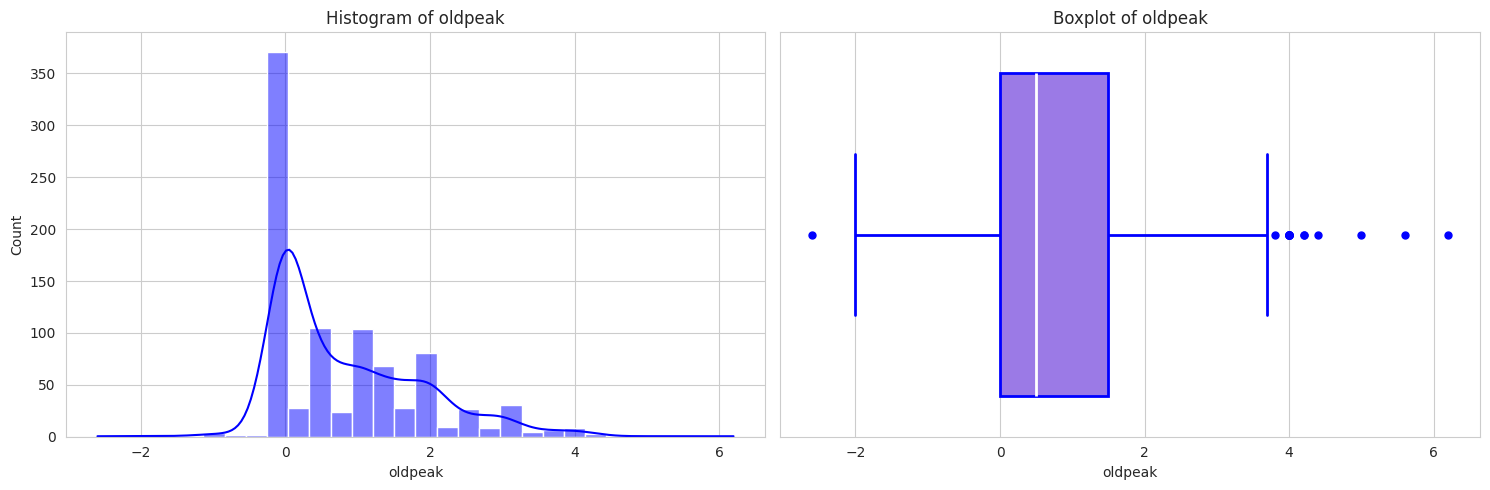

In [ ]:
plot_histogram_and_boxplot(df, ['oldpeak'])

Given that the skewness of the oldpeak distribution is approximately 1.1347, this indicates that the distribution is positively skewed, or right-skewed.This typically implies that there are a significant number of outlier values on the higher end of the oldpeak range, which could potentially influence any analysis or statistical modeling using this data. This would be addressed skewness by categorizing 'Oldpeak' via Binning to mitigate its skewed distributions.This approach not only simplifies the variable by grouping continuous data into discrete intervals, but also helps to minimize the influence of outliers and extreme values that can distort model training and statistical analysis.

<ipython-input-51-0b578405f8a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='oldpeak_binned', data=df, palette='viridis')  # Adjust the palette as needed


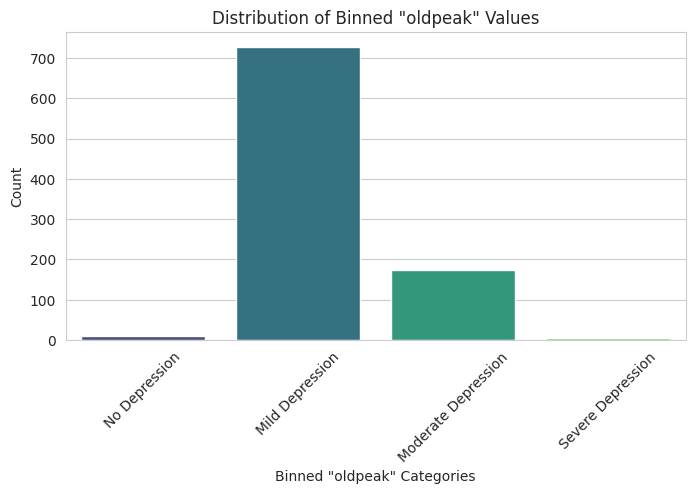

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it already contains the 'oldpeak' column

# Define the number of bins
number_of_bins = 4

# Calculate the range of the data (max - min)
max_oldpeak = df['oldpeak'].max()
min_oldpeak = df['oldpeak'].min()
data_range = max_oldpeak - min_oldpeak

# Calculate the bin width
bin_width = data_range / number_of_bins

# Generate the bin edges
bin_edges = [min_oldpeak + i * bin_width for i in range(number_of_bins + 1)]

# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data and create a new column for the binned data
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x='oldpeak_binned', data=df, palette='viridis')  # Adjust the palette as needed

plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [ ]:
df['oldpeak'] = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)